# Machine Learning: Linear Regression

## Black Friday Sales Prediction:

We are going to use a dataset of product purchases during a Black Friday (in the US). The main idea is to be able to generate a predictor that allows us to predict the `purchase amount`.

In order to achieve a good predictor we must apply the different concepts that we have been learning:

* `Exploration`
* `Feature Engineering`
* `Modeling`
* `Evaluation`

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer `purchase` behaviour against different products. The problem is a `regression problem` where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

### You can try differents Scikit-Learn models from [Linear Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

# Load the dataset

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/BlackFriday.csv")
data.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
532510,1003995,P00186642,M,36-45,17,C,3,1,2,4.0,15.0,12980
522514,1002457,P00194342,M,26-35,0,B,0,1,3,4.0,NaN,8110
150405,1005229,P00046742,M,26-35,0,C,0,0,1,2.0,15.0,19085
339533,1004253,P00113242,M,46-50,11,B,0,0,1,6.0,8.0,12022
402943,1001955,P00216342,M,0-17,19,C,4+,0,3,4.0,5.0,10883


# Explore the dataset

In [28]:
print(data.shape)
print(list(data.columns))

(537577, 12)
['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [29]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [30]:
# Explore the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [31]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [32]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

C:\Users\andre\AppData\Local\Temp\ipykernel_10232\2190574329.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data.corr(), dtype=bool))
C:\Users\andre\AppData\Local\Temp\ipykernel_10232\2190574329.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), mask=mask, annot=True, cmap='coolwarm')


<AxesSubplot: >

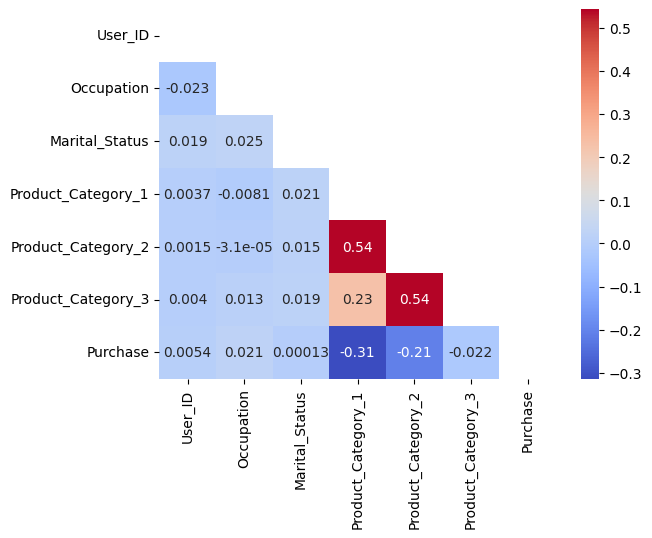

In [33]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, annot=True, cmap='coolwarm')

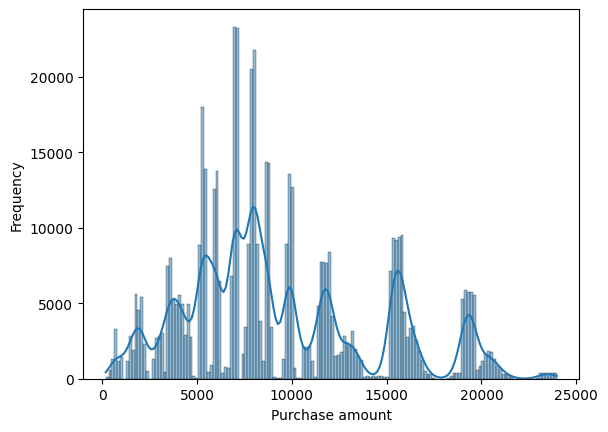

In [34]:
sns.histplot(data['Purchase'], kde=True)
plt.xlabel('Purchase amount')
plt.ylabel('Frequency')
plt.show()

# Handle missing values

In [35]:
# Create an instance of SimpleImputer to complete missing values:
#simple_imputer = SimpleImputer()

# Replace NaN values in Product_Category_2 and Product_Category_3 columns with the column means:
#data[['Product_Category_2', 'Product_Category_3']] = simple_imputer.fit_transform(data[['Product_Category_2', 'Product_Category_3']])

In [36]:
simple_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
simple_imputer = simple_imputer.fit(data.iloc[:, 9:11].values)
data.iloc[:, 9:11] = simple_imputer.transform(data.iloc[:, 9:11].values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# Feature engineering

In [37]:
object_features = data.select_dtypes(include=["object"]).nunique()
binary_features = object_features[object_features == 2].index
non_binary_features = object_features[object_features != 2].index

In [38]:
object_features

Product_ID                    3623
Gender                           2
Age                              7
City_Category                    3
Stay_In_Current_City_Years       5
dtype: int64

## Encode features:

In [39]:
# Dummies transformation:
## data = pd.get_dummies(data, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], drop_first=True)

In [40]:
# We encode Gender using binary encoding
data["Gender"] = pd.get_dummies(data["Gender"], drop_first=True)

In [41]:
# Encode Age using one-hot encoding
age_encoder = OneHotEncoder(categories=[['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']])
age_encoded = age_encoder.fit_transform(data["Age"].values.reshape(-1, 1))
data[["Age_"+cat for cat in age_encoder.categories_[0]]] = pd.DataFrame(age_encoded.toarray(), index=data.index).astype(int)

In [42]:
# Encode City_Category using one-hot encoding
city_encoder = OneHotEncoder(categories=[['A', 'B', 'C']])
city_encoded = city_encoder.fit_transform(data["City_Category"].values.reshape(-1, 1))
data[["City_"+cat for cat in city_encoder.categories_[0]]] = pd.DataFrame(city_encoded.toarray(), index=data.index).astype(int)

In [43]:
# Encode Stay_In_Current_City_Years using label encoding
stay_encoder = LabelEncoder()
data["Stay_In_Current_City_Years"] = stay_encoder.fit_transform(data["Stay_In_Current_City_Years"]).astype(int)

In [44]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_A,City_B,City_C
0,1000001,P00069042,0,0-17,10,A,2,0,3,9.842144,...,1,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.000000,...,1,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,0,0-17,10,A,2,0,12,9.842144,...,1,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.000000,...,1,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,1,55+,16,C,4,0,8,9.842144,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,1,36-45,16,C,1,0,1,2.000000,...,0,0,0,1,0,0,0,0,0,1
537573,1004737,P00111142,1,36-45,16,C,1,0,1,15.000000,...,0,0,0,1,0,0,0,0,0,1
537574,1004737,P00345942,1,36-45,16,C,1,0,8,15.000000,...,0,0,0,1,0,0,0,0,0,1
537575,1004737,P00285842,1,36-45,16,C,1,0,5,9.842144,...,0,0,0,1,0,0,0,0,0,1


In [45]:
# We drop unwanted columns:
data.drop(['User_ID', 'Product_ID', 'Age', 'City_Category'], axis=1, inplace=True)

In [51]:
data

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_A,City_B,City_C
0,0,10,2,0,3,9.842144,12.66984,8370,1,0,0,0,0,0,0,1,0,0
1,0,10,2,0,1,6.000000,14.00000,15200,1,0,0,0,0,0,0,1,0,0
2,0,10,2,0,12,9.842144,12.66984,1422,1,0,0,0,0,0,0,1,0,0
3,0,10,2,0,12,14.000000,12.66984,1057,1,0,0,0,0,0,0,1,0,0
4,1,16,4,0,8,9.842144,12.66984,7969,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1,16,1,0,1,2.000000,12.66984,11664,0,0,0,1,0,0,0,0,0,1
537573,1,16,1,0,1,15.000000,16.00000,19196,0,0,0,1,0,0,0,0,0,1
537574,1,16,1,0,8,15.000000,12.66984,8043,0,0,0,1,0,0,0,0,0,1
537575,1,16,1,0,5,9.842144,12.66984,7172,0,0,0,1,0,0,0,0,0,1


# Scale and normalize

In [46]:
# Scaling 'Purchase' feature:
#robust_scaler = RobustScaler()
#data["Purchase"] = robust_scaler.fit_transform(data[["Purchase"]])

# Modeling

In [48]:
# We split the dataset into training and testing sets:
X = data.drop(['Purchase'], axis=1)
y = data['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# We create the model:
lr = LinearRegression()
lr.fit(X_train, y_train)

# We make predictions:
y_pred_lr = lr.predict(X_test)

# Finally, we evaluate the model:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression:")
print("Mean Squared Error:", rmse_lr)
print("R^2 Score:", r2_lr)

Linear Regression:
Mean Squared Error: 4699.9902814225825
R^2 Score: 0.10942963803358918


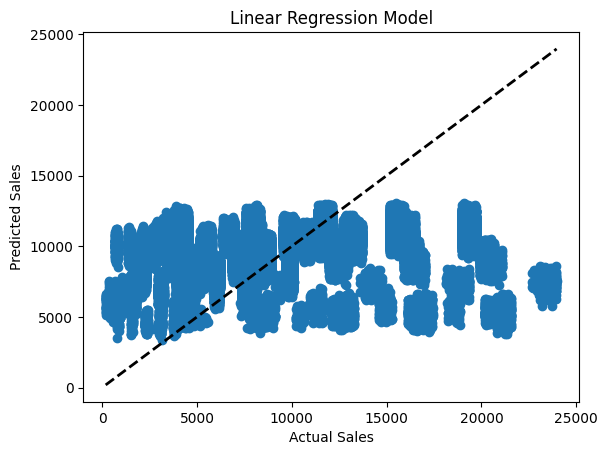

In [49]:
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression Model')
plt.show()

In [ ]:
# Create Ridge regression model with default parameters
ridge_reg = Ridge(alpha=0.1)

# Fit the model on the training data
ridge_reg.fit(X_train, y_train)

# Predict purchase amounts for the test set
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate the model's R-squared score on the test set
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Ridge Model:")
print("R-squared: {:.4f}".format(r2_ridge))
print("MSE: {:.4f}".format(mse_ridge))

In [ ]:
# Create Ridge regression model with cross-validation to select alpha
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

# Fit the model on the training data
ridge_cv.fit(X_train, y_train)

# Predict purchase amounts for the test set
y_pred_ridgecv = ridge_cv.predict(X_test)

# Calculate the model's R-squared score on the test set
r2_ridge_cv = ridge_cv.score(X_test, y_test)

# Get the best value of alpha selected by cross-validation
alpha = ridge_cv.alpha_

# Calculate and print the MSE
mse_ridge_cv = np.sqrt(mean_squared_error(y_test, y_pred_ridgecv))

# Print the R-squared score and best alpha value
print("R-squared score:", r2_ridge_cv)
print("Best alpha:", alpha)
print("MSE:", mse_ridge_cv)



In [ ]:
# Train the model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)

# Evaluate the model
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred))
r2_elastic = r2_score(y_test, y_pred)
print('Mean Squared Error:', rmse_elastic)
print('R-squared:', r2_elastic)

In [ ]:
# Get the coefficients learned by the Ridge regression model
coefficients = ridge_reg.coef_

# Create a DataFrame to display the coefficients for each feature
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coef_df)

In [ ]:
# Create Ridge regression model with different alpha values
alphas = [0.01, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    y_pred_ridge = ridge_reg.predict(X_test)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    print("Ridge Model (alpha = {}):".format(alpha))
    print("R-squared: {:.4f}".format(r2_ridge))
    print("MSE: {:.4f}".format(mse_ridge))

# Create Ridge regression model with cross-validation to select alpha
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])
ridge_cv.fit(X_train, y_train)
y_pred_ridgecv = ridge_cv.predict(X_test)
r2_ridge_cv = ridge_cv.score(X_test, y_test)
alpha = ridge_cv.alpha_
mse_ridge_cv = mean_squared_error(y_test, y_pred_ridgecv)

print("Ridge Model with Cross-Validation:")
print("Best alpha:", alpha)
print("R-squared: {:.4f}".format(r2_ridge_cv))
print("MSE: {:.4f}".format(mse_ridge_cv))